In [1]:
import sys
import os
import numpy
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# plt.rc('text', usetex=True)

FONT=18

sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1.5, "axes.labelsize":FONT, "axes.titlesize":FONT, "legend.fontsize":FONT, "xtick.labelsize":FONT, "ytick.labelsize":FONT, "font.size":FONT})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

DIR_REAL_DATA="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/swarp/"
DIR_SIMU="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/simulation/output"

fig_size_square = (5, 4)
fig_size_rect = (6.5, 4)

/usr/local/opt/python/bin/python3.7


In [2]:
# csv_file = DIR+"/simu-bb-runs2020-1c.csv"
# csv_file = DIR+"/simu-bb_runs2020-Xc.csv"
csv_file_cori = DIR_SIMU+"/simu-cori-runs-multi-pipelines-1c.csv"
csv_file_summit = DIR_SIMU+"/simu-summit-runs-multi-pipelines-1c.csv"

CORE="1"
PLOT_DIR=os.getcwd()
# PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/simu-swarp"

OUTPUT = PLOT_DIR+"/"+"simu-bb-runs2020-multipipeline-1C/"

In [3]:

try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")


Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/simu-bb-runs2020-multipipeline-1C/  already exists


In [4]:
df_cori = pd.read_csv(csv_file_cori, sep=' ')
df_summit = pd.read_csv(csv_file_summit, sep=' ')

df = pd.concat([df_cori, df_summit])
df["BB_TYPE"]= df["BB_TYPE"].str.replace("SUMMIT", "ONNODE", case = False)

df_priv = df[df.BB_TYPE=="PRIVATE"]
df_strip = df[df.BB_TYPE=="STRIPED"]
df_onnode = df[df.BB_TYPE=="ONNODE"]


df_agg = df.groupby(['ID', 'NB_PIPELINE','FITS', 'BB_TYPE', 'BB_NB_FILES','AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'max', 'ERR_MKSP': 'max', 'SIMULATION_S': 'max', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})


In [5]:
df_agg.head()

,ID,NB_PIPELINE,FITS,BB_TYPE,BB_NB_FILES,AVG,NB_CORES,MEASURED_MKSP_S,ERR_MKSP,SIMULATION_S,MEASURED_WALLTIME_S,ERR_WALLTIME
0,112043,32,Y,ONNODE,32,1,1,91.2036,0.137862,78.6301,95.0321,0.297854
1,112043,32,Y,ONNODE,32,2,1,92.3017,0.139615,79.4150,95.7935,0.303540
2,112043,32,Y,ONNODE,32,3,1,91.2675,0.137891,78.6826,99.2084,0.326004
3,112043,32,Y,ONNODE,32,4,1,90.4763,0.136394,78.1359,94.0009,0.290676
4,112043,32,Y,ONNODE,32,5,1,91.2743,0.137751,78.7012,99.0580,0.326291


In [6]:
df_real_cori = pd.read_csv(DIR_REAL_DATA+"/shared-cori/bb_runs2020-multipipeline-1C.csv", sep=' ')
df_real_summit = pd.read_csv(DIR_REAL_DATA+"/private-summit/runs-multi-pipelines-1c-clean.csv", sep=' ')
df_real = pd.concat([df_real_cori, df_real_summit])

big = pd.merge(df, df_real, on=['ID', 'NB_PIPELINE','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'])

bigagg = big.groupby(['ID', 'NB_PIPELINE','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'max', 'MAKESPAN_S': 'max', 'SIMULATION_S': 'max', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
bigagg['ERR'] = (abs(bigagg['MAKESPAN_S'] - bigagg['SIMULATION_S']) / bigagg['SIMULATION_S']) *100
bigagg.head()

,ID,NB_PIPELINE,FITS,BB_TYPE,AVG,NB_CORES,MEASURED_MKSP_S,MAKESPAN_S,SIMULATION_S,MEASURED_WALLTIME_S,ERR_WALLTIME,ERR
0,112043,32,Y,ONNODE,1,1,91.2036,89.244617,78.6301,95.0321,0.297854,13.499305
1,112043,32,Y,ONNODE,2,1,92.3017,89.943674,79.4150,95.7935,0.303540,13.257790
2,112043,32,Y,ONNODE,3,1,91.2675,89.968515,78.6826,99.2084,0.326004,14.343596
3,112043,32,Y,ONNODE,4,1,90.4763,88.146305,78.1359,94.0009,0.290676,12.811531
4,112043,32,Y,ONNODE,5,1,91.2743,89.208339,78.7012,99.0580,0.326291,13.350672


In [8]:
print(bigagg.head())
print("BB_NB_FILES :", df.BB_NB_FILES.unique())
print("BB_TYPE     :", df.BB_TYPE.unique())
print("BB_TYPE     :", df.FITS.unique())
print("NB_PIPELINE :", df.NB_PIPELINE.unique())

       ID  NB_PIPELINE FITS BB_TYPE  AVG  NB_CORES  MEASURED_MKSP_S  \
0  112043           32    Y  ONNODE    1         1          91.2036   
1  112043           32    Y  ONNODE    2         1          92.3017   
2  112043           32    Y  ONNODE    3         1          91.2675   
3  112043           32    Y  ONNODE    4         1          90.4763   
4  112043           32    Y  ONNODE    5         1          91.2743   

   MAKESPAN_S  SIMULATION_S  MEASURED_WALLTIME_S  ERR_WALLTIME        ERR  
0   89.244617       78.6301              95.0321      0.297854  13.499305  
1   89.943674       79.4150              95.7935      0.303540  13.257790  
2   89.968515       78.6826              99.2084      0.326004  14.343596  
3   88.146305       78.1359              94.0009      0.290676  12.811531  
4   89.208339       78.7012              99.0580      0.326291  13.350672  
BB_NB_FILES : [32]
BB_TYPE     : ['PRIVATE' 'STRIPED' 'ONNODE']
BB_TYPE     : ['Y']
NB_PIPELINE : [16  1 32  4  8]


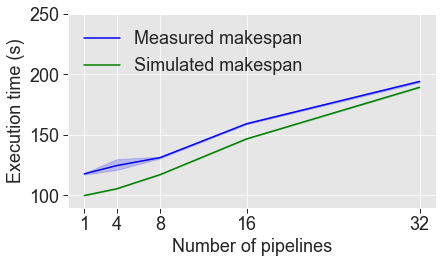

In [9]:
xlabel='Number of pipelines'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

is_FITS = bigagg['BB_TYPE']=="FITS"
is_PRIVATE = bigagg['BB_TYPE']=="PRIVATE"
is_STRIPED = bigagg['BB_TYPE']=="STRIPED"
is_ONNODE = bigagg['BB_TYPE']=="ONNODE"


f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="NB_PIPELINE", y="MAKESPAN_S", data=bigagg[is_PRIVATE],  color="b", markers=True)
g = sns.lineplot(x="NB_PIPELINE", y="SIMULATION_S", data=bigagg[is_PRIVATE],  color="g", markers=True)

# ax2 = g.twinx()
# sns.lineplot(x="NB_PIPELINE", y="ERR", data=bigagg[is_PRIVATE], markers='x', ax=ax2, ci=None, color="black")

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"], frameon=False)

# ax2.legend(loc='lower right', title='', labels=["Error"])
# ax2.set(ylabel="Error (%)")
g.set(xlabel=xlabel, ylabel=ylabel, xticks=bigagg.NB_PIPELINE.unique(), ylim=(90, 250))
# plt.grid()

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-private-mksp-pipeline.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-private-mksp-pipeline.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [10]:
print("PRIVATE: min error",
    min(bigagg[is_PRIVATE]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_PRIVATE]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_PRIVATE]['ERR']),
    ", max error",
    max(bigagg[is_PRIVATE]['ERR']),
)

PRIVATE: min error 1.2221309111596512 , avg error 11.820647752506249 , sd error 7.299758868822769 , max error 51.5133953293482


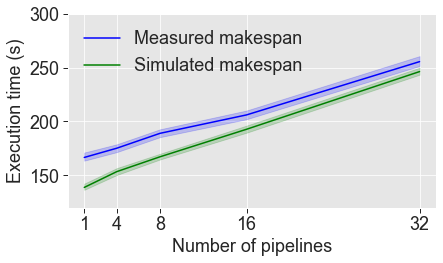

In [11]:
xlabel='Number of pipelines'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="NB_PIPELINE", y="MAKESPAN_S", data=bigagg[is_STRIPED],  color="b", markers=True)
g = sns.lineplot(x="NB_PIPELINE", y="SIMULATION_S", data=bigagg[is_STRIPED],  color="g", markers=True)

# ax2 = g.twinx()
# sns.lineplot(x="NB_PIPELINE", y="ERR", data=bigagg[~is_PRIVATE], markers='x', ax=ax2, ci=None, color="black")

# ax2.legend(loc='lower right', title='', labels=["Error"])
# ax2.set(ylabel="Error (%)")

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"], frameon=False)
g.set(xlabel=xlabel, ylabel=ylabel, xticks=bigagg.NB_PIPELINE.unique(), ylim=(120, 300))
# plt.grid()
plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-pipeline.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-pipeline.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [12]:
print("STRIPED: min error",
    min(bigagg[is_STRIPED]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_STRIPED]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_STRIPED]['ERR']),
    ", max error",
    max(bigagg[is_STRIPED]['ERR']),
)

STRIPED: min error 2.2649758679050116 , avg error 11.590261440465582 , sd error 5.984551103878294 , max error 21.799504295831326


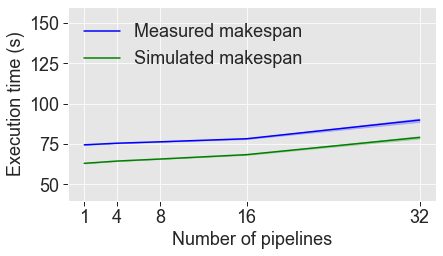

In [13]:
xlabel='Number of pipelines'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="NB_PIPELINE", y="MAKESPAN_S", data=bigagg[is_ONNODE],  color="b", markers=True)
g = sns.lineplot(x="NB_PIPELINE", y="SIMULATION_S", data=bigagg[is_ONNODE],  color="g", markers=True)

# ax2 = g.twinx()
# sns.lineplot(x="NB_PIPELINE", y="ERR", data=bigagg[~is_PRIVATE], markers='x', ax=ax2, ci=None, color="black")

# ax2.legend(loc='lower right', title='', labels=["Error"])
# ax2.set(ylabel="Error (%)")

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"], frameon=False)
g.set(xlabel=xlabel, ylabel=ylabel, xticks=bigagg.NB_PIPELINE.unique(), ylim=(40, 160))
# plt.grid()
plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-onnode-mksp-pipeline.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-onnode-mksp-pipeline.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [14]:
print("ONNODE: min error",
    min(bigagg[is_ONNODE]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_ONNODE]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_ONNODE]['ERR']),
    ", max error",
    max(bigagg[is_ONNODE]['ERR']),
)

ONNODE: min error 9.75766712353365 , avg error 15.918087315095882 , sd error 1.8072056885505188 , max error 18.294858025020694
